In [2]:
import sys

import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.io as sio
import cartopy.crs as ccrs

In [ ]:

# Carica i file .mat
#data = sio.loadmat('U1_S1_M1load.mat')
Accelerations = np.zeros((2,2,2,63000,4))

for u in range(1,3):
    for s in range(1,3):
        for m in range(1,3):
            fileName = 'U'+str(u) +'_S'+ str(s)+ '_M'+ str(m)+'load.mat'
            #print(name+' loaded')
            
            data = sio.loadmat(fileName)
            Acceleration = data['acceleration']
            
            print('data in size:'+str(data['acceleration'].shape[0]))
            diff = 65000 - data['acceleration'].shape[0]
            #print(diff)
            np.pad(Acceleration, ((0,diff),(0,4)), 'constant', constant_values=(0, 0))
            #print('new size:')
            #print(Acceleration.shape)
            
            Accelerations[u-1,s-1,m-1,:,:] = Acceleration[:63000,:]

#print(data.keys())
#Acceleration = data['acceleration']
#print(data['acceleration'].shape)
#print(Acceleration[3])

#carico nel trainData is

data in size:63948
data in size:63123
data in size:64681
data in size:64007
data in size:64620
data in size:64577
data in size:63102
data in size:63660


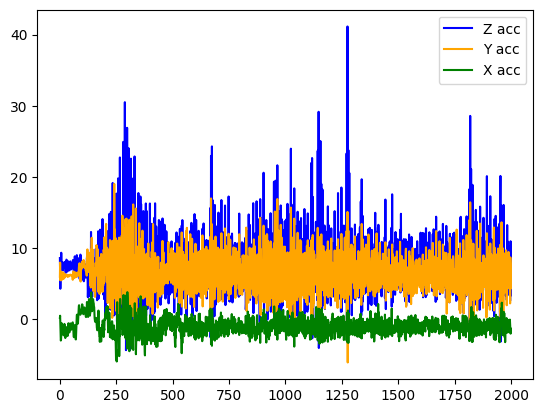

In [5]:

Acceleration = data['acceleration']
span = 1000
current = 1
start = current * span
stop = (current+1) * span

#timestamp = np.squeeze(Acceleration[:stop,0])
acc_x = np.squeeze(Acceleration[:stop,1])
acc_y = np.squeeze(Acceleration[:stop,2])
acc_z = np.squeeze(Acceleration[:stop,3])


plt.plot( acc_z, label='Z acc', color='blue')
plt.plot( acc_y, label='Y acc', color='orange')
plt.plot( acc_x, label='X acc', color='green')
plt.legend()


251


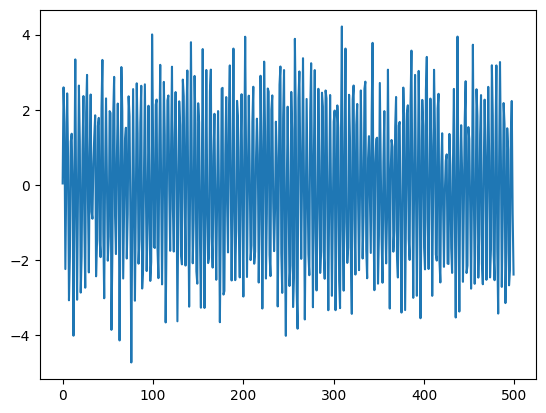

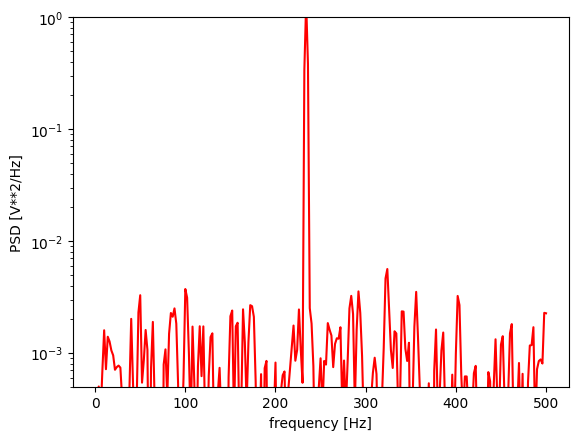

In [19]:
##test welch
from scipy import signal
rng = np.random.default_rng()
fs = 10e2
N = 500
amp = 2*np.sqrt(2)
freq = 1234.0
noise_power = 0.001 * fs / 2
time = np.arange(N) / fs
x = amp*np.sin(2*np.pi*freq*time)
x += rng.normal(scale=np.sqrt(noise_power), size=time.shape)

plt.plot(x)
f, Pxx_den = signal.welch(x, fs, nperseg=2048)
plt.figure()
plt.semilogy(f, Pxx_den, color = 'Red')

plt.ylim([0.5e-3, 1])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
#plt.show()
print(len(f))

Text(0.5, 1.0, 'Z')

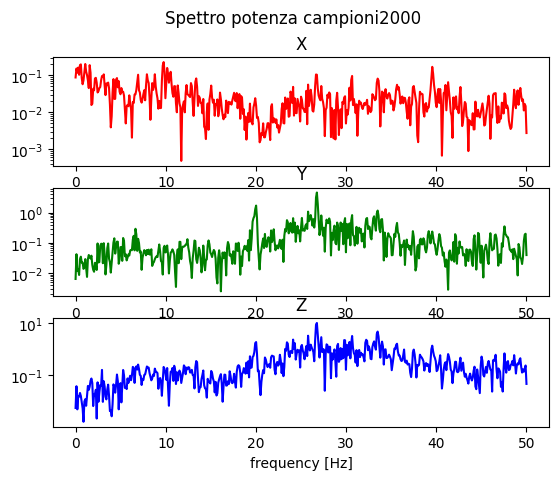

In [8]:
fs = 100
f, Pxacc = signal.welch(acc_x, fs, nperseg=1024)
f, Pyacc = signal.welch(acc_y, fs, nperseg=1024)
f, Pzacc = signal.welch(acc_z, fs, nperseg=1024)
'''
plt.semilogy(f, Pxacc, color = 'Red')
plt.semilogy(f, Pyacc, color = 'green')
plt.semilogy(f, Pzacc, color = 'blue')
'''
fig, (ax1, ax2, ax3) = plt.subplots(3)
fig.suptitle('Spettro potenza campioni'+str(stop))
ax1.semilogy(f, Pxacc, color = 'Red')
ax1.set_title('X')
plt.xlabel('frequency [Hz]')
ax2.semilogy(f, Pyacc, color = 'green')
ax2.set_title('Y')
ax3.semilogy(f, Pzacc, color = 'blue')
ax3.set_title('Z')


In [ ]:
#creazione dataset di elaborazione
percentAcqTrain = 0.6
nSamples = 500

1
2
